In [1]:
import numpy as np
import matplotlib.pyplot as plot
import cv2

1.	Selecciona una imagen, cárgala en escala de grises dentro del notebook y asígnala a una variable en Python, utilizando openCV. Asegúrate de que sean de extensión .jpg, .jpeg o .png.

In [35]:
imageoriginal = cv2.imread('familia.jpg')
imagegray = cv2.cvtColor(imageoriginal, cv2.COLOR_BGR2GRAY)


In [36]:
print(imagegray.shape)#si la imagen es cargada a color, la tupla regresa tambiem los canales de color

(1880, 3968)


2.	Extrae y muestra los puntos de interés SIFT de la imagen del paso anterior, indicando su orientación y escala.

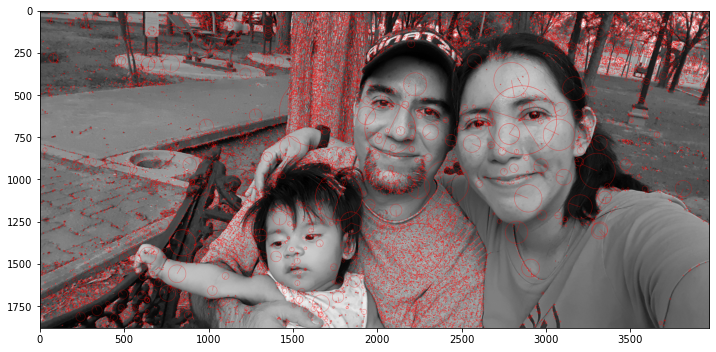

In [37]:
#sift = cv2.xfeatures2d.SIFT_create() , not working on my opencv version
sift = cv2.SIFT_create()
kp1 , descriptor1 = sift.detectAndCompute(imageoriginal, None)
#color en rojo = RGB = 255,0,0
#img01kp = cv2.drawKeypoints(imagegray, kp1, imageoriginal,(255, 0, 0) ,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
#DRAW_RICH_KEYPOINTS: For each keypoint the circle around keypoint with keypoint size and orientation will be drawn. 
img01kp = cv2.drawKeypoints(imagegray, kp1, imageoriginal,(255, 0, 0) ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plot.figure(figsize=(12,12))
plot.imshow(img01kp)

3.Gira la imagen 60° con la función cv2.warpAffine, extrae y muestra los puntos de interés SIFT.

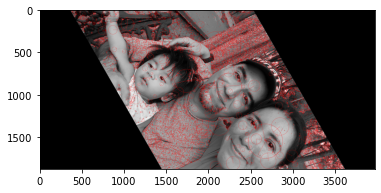

In [38]:
centro1= (imageoriginal.shape[1]//2,imageoriginal.shape[0]//2)
angulorotacion1=cv2.getRotationMatrix2D(centro1, -60, 1)
img01_rot = cv2.warpAffine(imageoriginal,angulorotacion1,(imageoriginal.shape[1], imageoriginal.shape[0]))
plot.imshow (img01_rot)

4.	Mapea los puntos de interés de las imágenes utilizadas en los pasos 1 y 3. Descarta las coincidencias incorrectas utilizando la prueba de proporción propuesta en el siguiente recurso y muestra las coincidencias entra ambas imágenes con líneas. 

Recurso: Distinctive Image Features
from Scale-Invariant Keypoints , by David G. Lowe : https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf 

El algoritmo es BFMatcher.knnMatch()
Documentación Open CV: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

Brute-Force Matching with SIFT Descriptors and Ratio Test

This time, we will use BFMatcher.knnMatch() to get k best matches. In this example, we will take k=2 so that we can apply ratio test explained by D.Lowe in his paper.

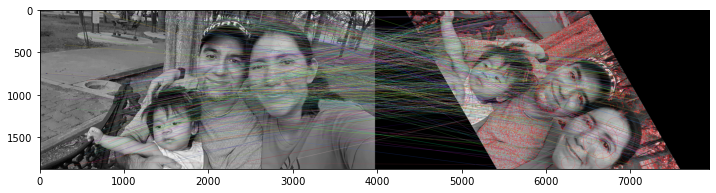

In [41]:
img1 = imagegray       # queryImage
img2 = img01_rot  # trainImage
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plot.figure(figsize=(12,12))
plot.imshow(img3)
plot.show()